[IPython Notebook](binary_spots.ipynb) |  [Python Script](binary_spots.py)

Binary with Spots
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Spots
---------------------

Let's add one spot to each of our stars in the binary.

A spot is a feature, and needs to be attached directly to a component upon creation.  Providing a tag for 'feature' is entirely optional - if one is not provided it will be created automatically.

In [3]:
b.add_feature('spot', component='primary', feature='spot01')

<ParameterSet: 4 parameters | qualifiers: colat, colon, radius, relteff>

As a shortcut, we can also call add_spot directly.

In [4]:
b.add_spot(component='secondary', feature='spot02')

<ParameterSet: 4 parameters | qualifiers: colat, colon, radius, relteff>

Spot Parameters
-----------------

A spot is defined by the colatitude and colongitude of its center, its angular radius, and the ratio of temperature of the spot to the local intrinsic value.

In [5]:
print b['spot01']

colat@spot01@feature: 0.0 deg
colon@spot01@feature: 0.0 deg
radius@spot01@feature: 1.0 deg
relteff@spot01@feature: 1.0


In [6]:
b.set_value(qualifier='relteff', feature='spot01', value=0.9)

In [7]:
b.set_value(qualifier='radius', feature='spot01', value=30)

In [8]:
b.set_value(qualifier='colat', feature='spot01', value=45)

In [9]:
b.set_value(qualifier='colon', feature='spot01', value=90)

By default this spot should be on the pole of the star.  To see the spot, let's compute and plot the protomesh.

In [10]:
b.run_compute(store_mesh=True)

<ParameterSet: 32 parameters | datasets: protomesh, automesh>

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:240: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:240: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


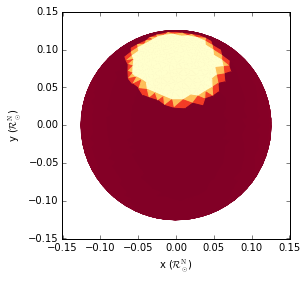

In [11]:
axs, artists = b.plot(component='primary', facecolor='teff', facecmap='YlOrRd', edgecolor=None)